# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:14:04   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

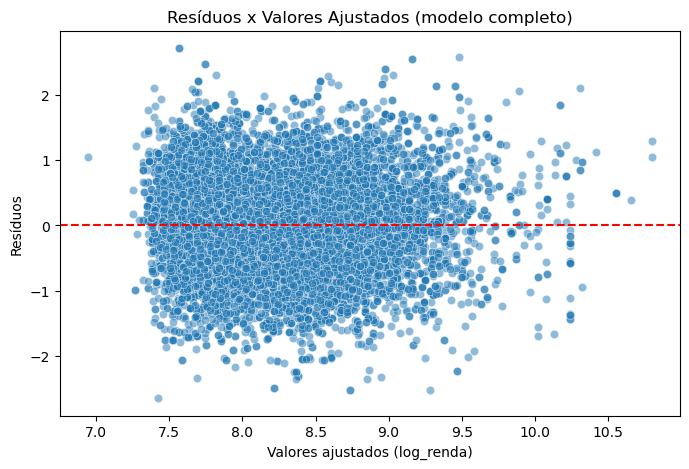

In [5]:
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Criar log da renda para usar como variável resposta
df['log_renda'] = np.log(df['renda'])

# Montar a fórmula usando Patsy, com as categorias mais frequentes como referência
# Aqui eu uso C(..., Treatment("categoria")) para criar as dummies
formula_completa = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '                    # referência: F (mais frequente)
    'C(posse_de_veiculo, Treatment(False)) + '      # referência: não tem veículo
    'C(posse_de_imovel, Treatment(True)) + '        # referência: tem imóvel
    'C(tipo_renda, Treatment("Assalariado")) + '    # referência: Assalariado
    'C(educacao, Treatment("Secundário")) + '       # referência: Secundário
    'C(estado_civil, Treatment("Casado")) + '       # referência: Casado
    'C(tipo_residencia, Treatment("Casa")) + '      # referência: Casa
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajustar o modelo de regressão linear com todas as covariáveis
modelo_1 = smf.ols(formula_completa, data=df).fit()

# Mostrar o resumo do modelo (R², p-values, coeficientes etc.)
print(modelo_1.summary())


# Gráfico de resíduos x valores ajustados

residuos_1 = modelo_1.resid
ajustados_1 = modelo_1.fittedvalues

# Gráfico de dispersão dos resíduos
plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_1, y=residuos_1, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo completo)")
plt.show()



                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:23:05   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

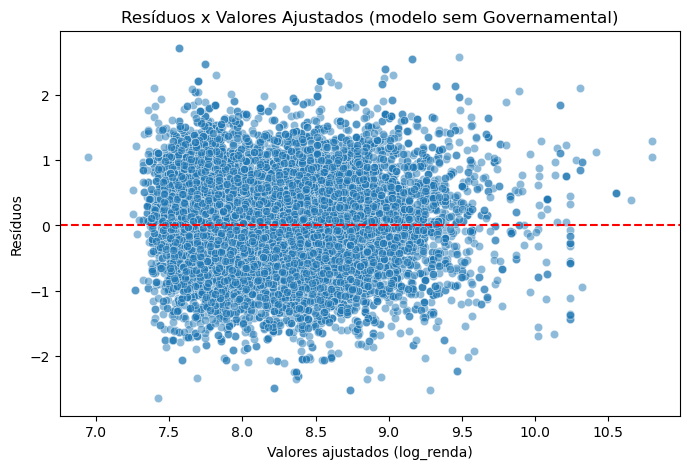

In [6]:
# Ajuste removendo a variável C(tipo_residencia)[T.Governamental]
formula_sem_governamental = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '
    'C(estado_civil, Treatment("Casado")) + '
    'C(tipo_residencia, Treatment("Casa")) + '  # ajuste tirando Governamental
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajuste do novo modelo sem a categoria governamental
modelo_2 = smf.ols(formula_sem_governamental, data=df).fit()

# Resumo do modelo
print(modelo_2.summary())

# Gráfico de resíduos x valores ajustados do novo modelo
residuos_2 = modelo_2.resid
ajustados_2 = modelo_2.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_2, y=residuos_2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem Governamental)")
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:25:07   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

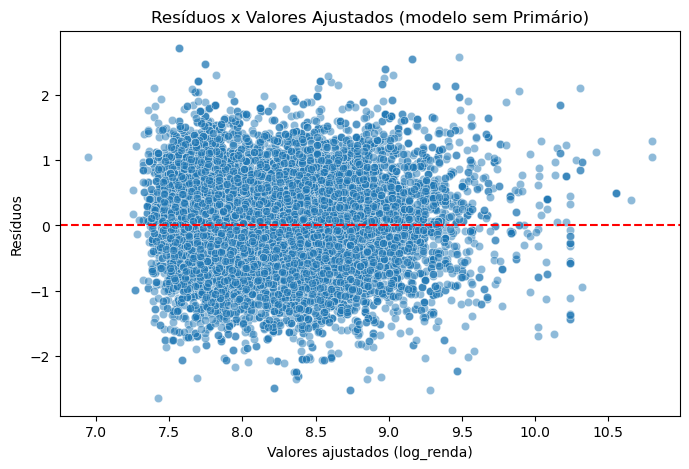

In [7]:
# Ajuste removendo a variável C(educacao)[T.Primário]
formula_sem_primario = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '  # ajuste tirando a categoria Primário
    'C(estado_civil, Treatment("Casado")) + '
    'C(tipo_residencia, Treatment("Casa")) + '
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajuste do novo modelo sem Primário
modelo_3 = smf.ols(formula_sem_primario, data=df).fit()

# Resumo do modelo
print(modelo_3.summary())

# Gráfico de resíduos x valores ajustados
residuos_3 = modelo_3.resid
ajustados_3 = modelo_3.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_3, y=residuos_3, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem Primário)")
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:29:18   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

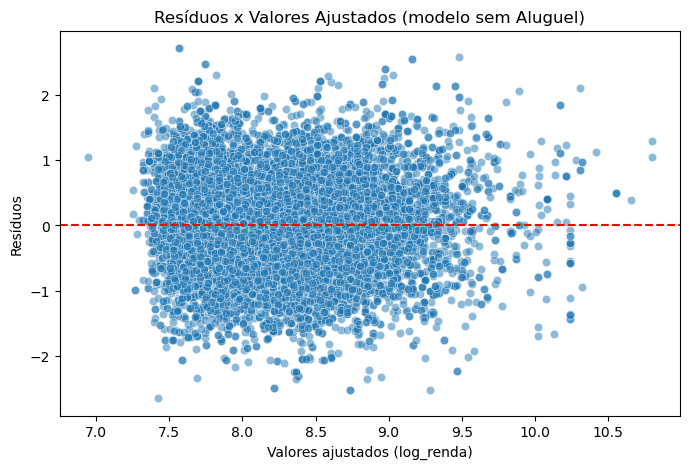

In [8]:
# Ajuste removendo a variável C(tipo_residencia)[T.Aluguel]
formula_sem_aluguel = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '
    'C(estado_civil, Treatment("Casado")) + '
    'C(tipo_residencia, Treatment("Casa")) + '  # remoção da categoria Aluguel
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajuste do modelo sem Aluguel
modelo_4 = smf.ols(formula_sem_aluguel, data=df).fit()

# Resumo do modelo
print(modelo_4.summary())

# Gráfico de resíduos x valores ajustados
residuos_4 = modelo_4.resid
ajustados_4 = modelo_4.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_4, y=residuos_4, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem Aluguel)")
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:40:09   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

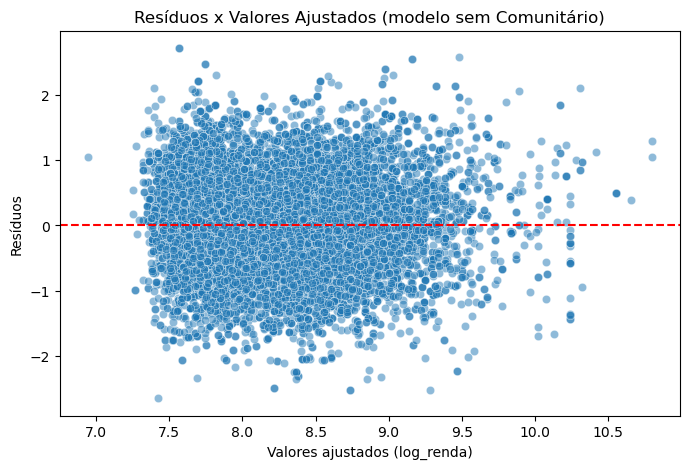

In [12]:
# Ajuste do novo modelo sem Comunitário
modelo_5 = smf.ols(formula_sem_comunitario, data=df).fit()

# Resumo do modelo
print(modelo_5.summary())

# Gráfico de resíduos x valores ajustados
residuos_5 = modelo_5.resid
ajustados_5 = modelo_5.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_5, y=residuos_5, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem Comunitário)")
plt.show()



                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:40:39   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

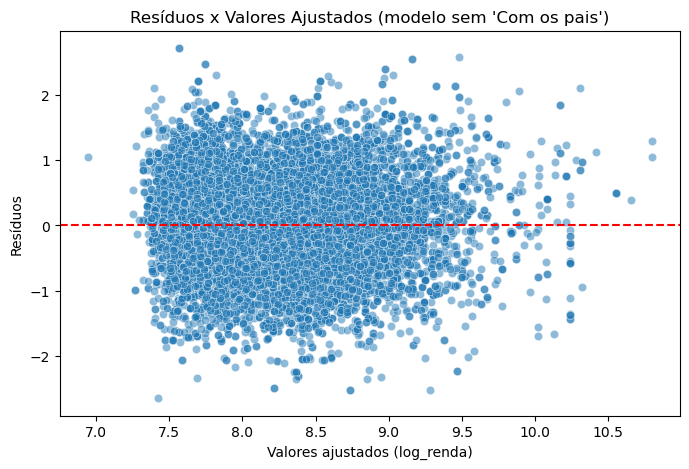

In [13]:
# Ajuste removendo a variável C(tipo_residencia)[T.Com os pais]
formula_sem_comospais = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '
    'C(estado_civil, Treatment("Casado")) + '
    'C(tipo_residencia, Treatment("Casa")) + '  # removida a categoria Com os pais
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajuste do novo modelo sem Com os pais
modelo_6 = smf.ols(formula_sem_comospais, data=df).fit()

# Resumo do modelo
print(modelo_6.summary())

# Gráfico de resíduos x valores ajustados
residuos_6 = modelo_6.resid
ajustados_6 = modelo_6.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_6, y=residuos_6, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem 'Com os pais')")
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:46:09   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

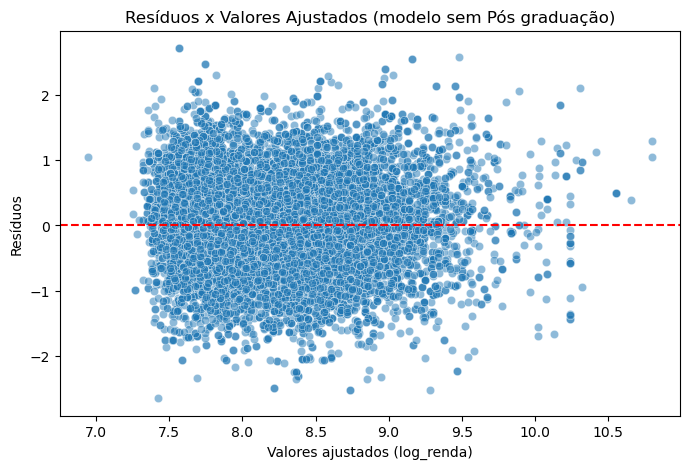

In [14]:
# Removendo C(educacao)[T.Pós graduação]
formula_sem_posgraduacao = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '  # removida Pós graduação
    'C(estado_civil, Treatment("Casado")) + '
    'C(tipo_residencia, Treatment("Casa")) + '
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

modelo_7 = smf.ols(formula_sem_posgraduacao, data=df).fit()

print(modelo_7.summary())

residuos_7 = modelo_7.resid
ajustados_7 = modelo_7.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_7, y=residuos_7, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem Pós graduação)")
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:48:05   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

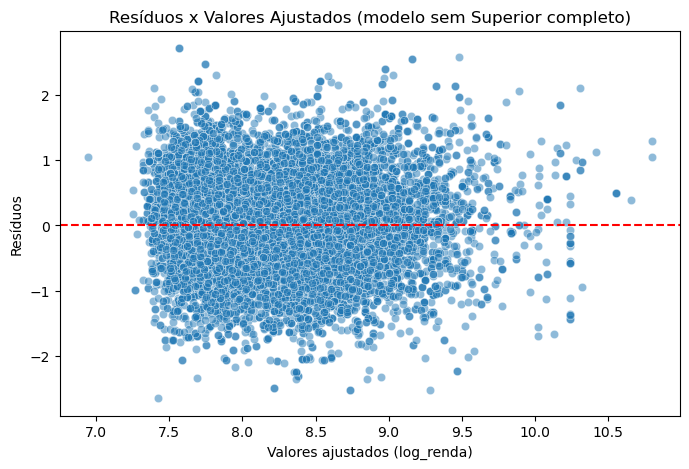

In [15]:
# Removendo C(educacao)[T.Superior completo]
formula_sem_superior_completo = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '  # removida categoria Superior completo
    'C(estado_civil, Treatment("Casado")) + '
    'C(tipo_residencia, Treatment("Casa")) + '
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajuste do modelo sem Superior completo
modelo_8 = smf.ols(formula_sem_superior_completo, data=df).fit()

# Resumo do modelo
print(modelo_8.summary())

# Gráfico de resíduos x valores ajustados
residuos_8 = modelo_8.resid
ajustados_8 = modelo_8.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_8, y=residuos_8, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem Superior completo)")
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:48:57   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

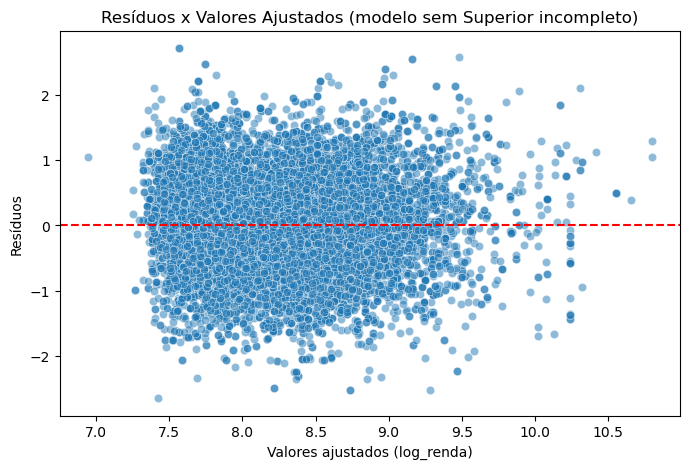

In [16]:
# Removendo C(educacao)[T.Superior incompleto]
formula_sem_superior_incompleto = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '  # removida categoria Superior incompleto
    'C(estado_civil, Treatment("Casado")) + '
    'C(tipo_residencia, Treatment("Casa")) + '
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajuste do novo modelo
modelo_9 = smf.ols(formula_sem_superior_incompleto, data=df).fit()

# Resumo do modelo
print(modelo_9.summary())

# Gráfico de resíduos x valores ajustados
residuos_9 = modelo_9.resid
ajustados_9 = modelo_9.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_9, y=residuos_9, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem Superior incompleto)")
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:50:28   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

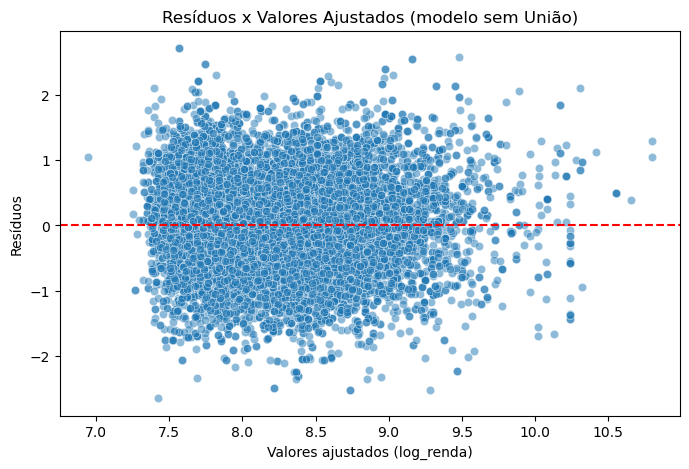

In [17]:
# Removendo C(estado_civil)[T.União]
formula_sem_uniao = (
    'log_renda ~ '
    'C(sexo, Treatment("F")) + '
    'C(posse_de_veiculo, Treatment(False)) + '
    'C(posse_de_imovel, Treatment(True)) + '
    'C(tipo_renda, Treatment("Assalariado")) + '
    'C(educacao, Treatment("Secundário")) + '
    'C(estado_civil, Treatment("Casado")) + '  # removida categoria União
    'C(tipo_residencia, Treatment("Casa")) + '
    'idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia'
)

# Ajuste do modelo
modelo_10 = smf.ols(formula_sem_uniao, data=df).fit()

# Resumo
print(modelo_10.summary())

# Gráfico de resíduos
residuos_10 = modelo_10.resid
ajustados_10 = modelo_10.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados_10, y=residuos_10, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos x Valores Ajustados (modelo sem União)")
plt.show()


Após remover todas as variáveis com p-valor superior a 5%, observou-se que o desempenho do modelo permaneceu essencialmente inalterado. As variáveis excluídas apresentavam coeficientes muito próximos de zero e baixa significância estatística, indicando que não contribuíam de forma relevante para explicar a variação da renda.

A comparação entre o modelo inicial e o modelo final mostrou que:

O R² ajustado permaneceu praticamente idêntico, indicando que a capacidade explicativa do modelo não mudou;

Os valores de AIC e BIC não apresentaram melhora significativa, reforçando que a complexidade reduzida não trouxe ganho de qualidade;

Os coeficientes das variáveis significativas ficaram praticamente estáveis, demonstrando que a remoção das variáveis irrelevantes não distorceu o modelo.

Em síntese, o modelo final não melhora nem piora em relação ao modelo inicial.
A única diferença é que ele se torna mais parcimonioso — isto é, mais simples — sem perda de desempenho.

Isso confirma que as variáveis removidas realmente não possuíam poder explicativo e apenas adicionavam ruído ao modelo.